# Assignment 03 – Random Forest and Stacking

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


There are two steps in this assignment: 1) Training and testing most of the algorithms over the given dataset, and 2) Using the best algorithms (classifiers) to generate a stacked model. You will also export the model in a pickle file, load it again and test it on one of the feature vectors from
the dataset. You will submit both the ipynb and pdf files for the ensemble export. Total points =75 (no extra points in this assignment).

You will use the credit card dataset uploaded here. Please start with a random.seed(last four digits of your GUIDg). The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced. The positive class
(frauds) accounts for 0.172% of all transactions.

All the variables are continuous and have been transformed by using PCA. Features V1, V2, ...
V28 are the principal components obtained with PCA. The only features that have not been transformed with PCA are 'Time' and 'Amount.' Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the
transaction Amount. This feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable, and it takes value 1 in case of fraud and 0 otherwise. The
goal is to predict the class.

Since this is a classification dataset, for the first part, you will follow the steps in assignment 2 (and some more) as shown below. The code is already with you, and you can use that.

1. Load the dataset. (1)

In [4]:
import random
from seaborn.palettes import color_palette
random.seed(9001)
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
import pandas as pd
creditcard_g05 = pd.read_csv('drive/MyDrive/creditcard.csv')
creditcard_g05 = creditcard_g05.sample(frac =.32)

2. Show first 6 data points using head(). (1)

In [4]:
print(creditcard_g05.head(6))

            Time        V1        V2        V3        V4        V5        V6  \
134808   80973.0  1.196074  0.195887  0.617847  0.649473 -0.474422 -0.716192   
167873  118936.0  1.899473 -0.334454 -3.261301 -0.549380  2.620258  3.035003   
29415    35463.0 -1.678301 -2.530738  0.679016 -2.054621 -1.191625  0.237019   
137369   82132.0  1.155546  0.114853  0.959628  1.806216 -0.524875  0.101018   
129756   79207.0  1.050238 -0.282440  1.228065  0.711805 -0.809354  0.510775   
257676  158289.0  0.088148  0.840884  0.000937 -0.757737  0.780921 -0.645418   

              V7        V8        V9  ...       V21       V22       V23  \
134808 -0.027476 -0.073307  0.057286  ... -0.211910 -0.589961  0.210375   
167873 -0.283026  0.705718  0.431229  ...  0.238347  0.572740 -0.046667   
29415   1.040310 -0.042198 -2.597899  ...  0.095585 -0.479544  1.102036   
137369 -0.412903  0.163538 -0.037722  ... -0.054888 -0.071578  0.065726   
129756 -0.724783  0.310611  0.556662  ...  0.010067  0.203418  0

3. Describe pandas Dataframe by using describe. (1)

In [7]:
creditcard_g05.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


4 Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (1)

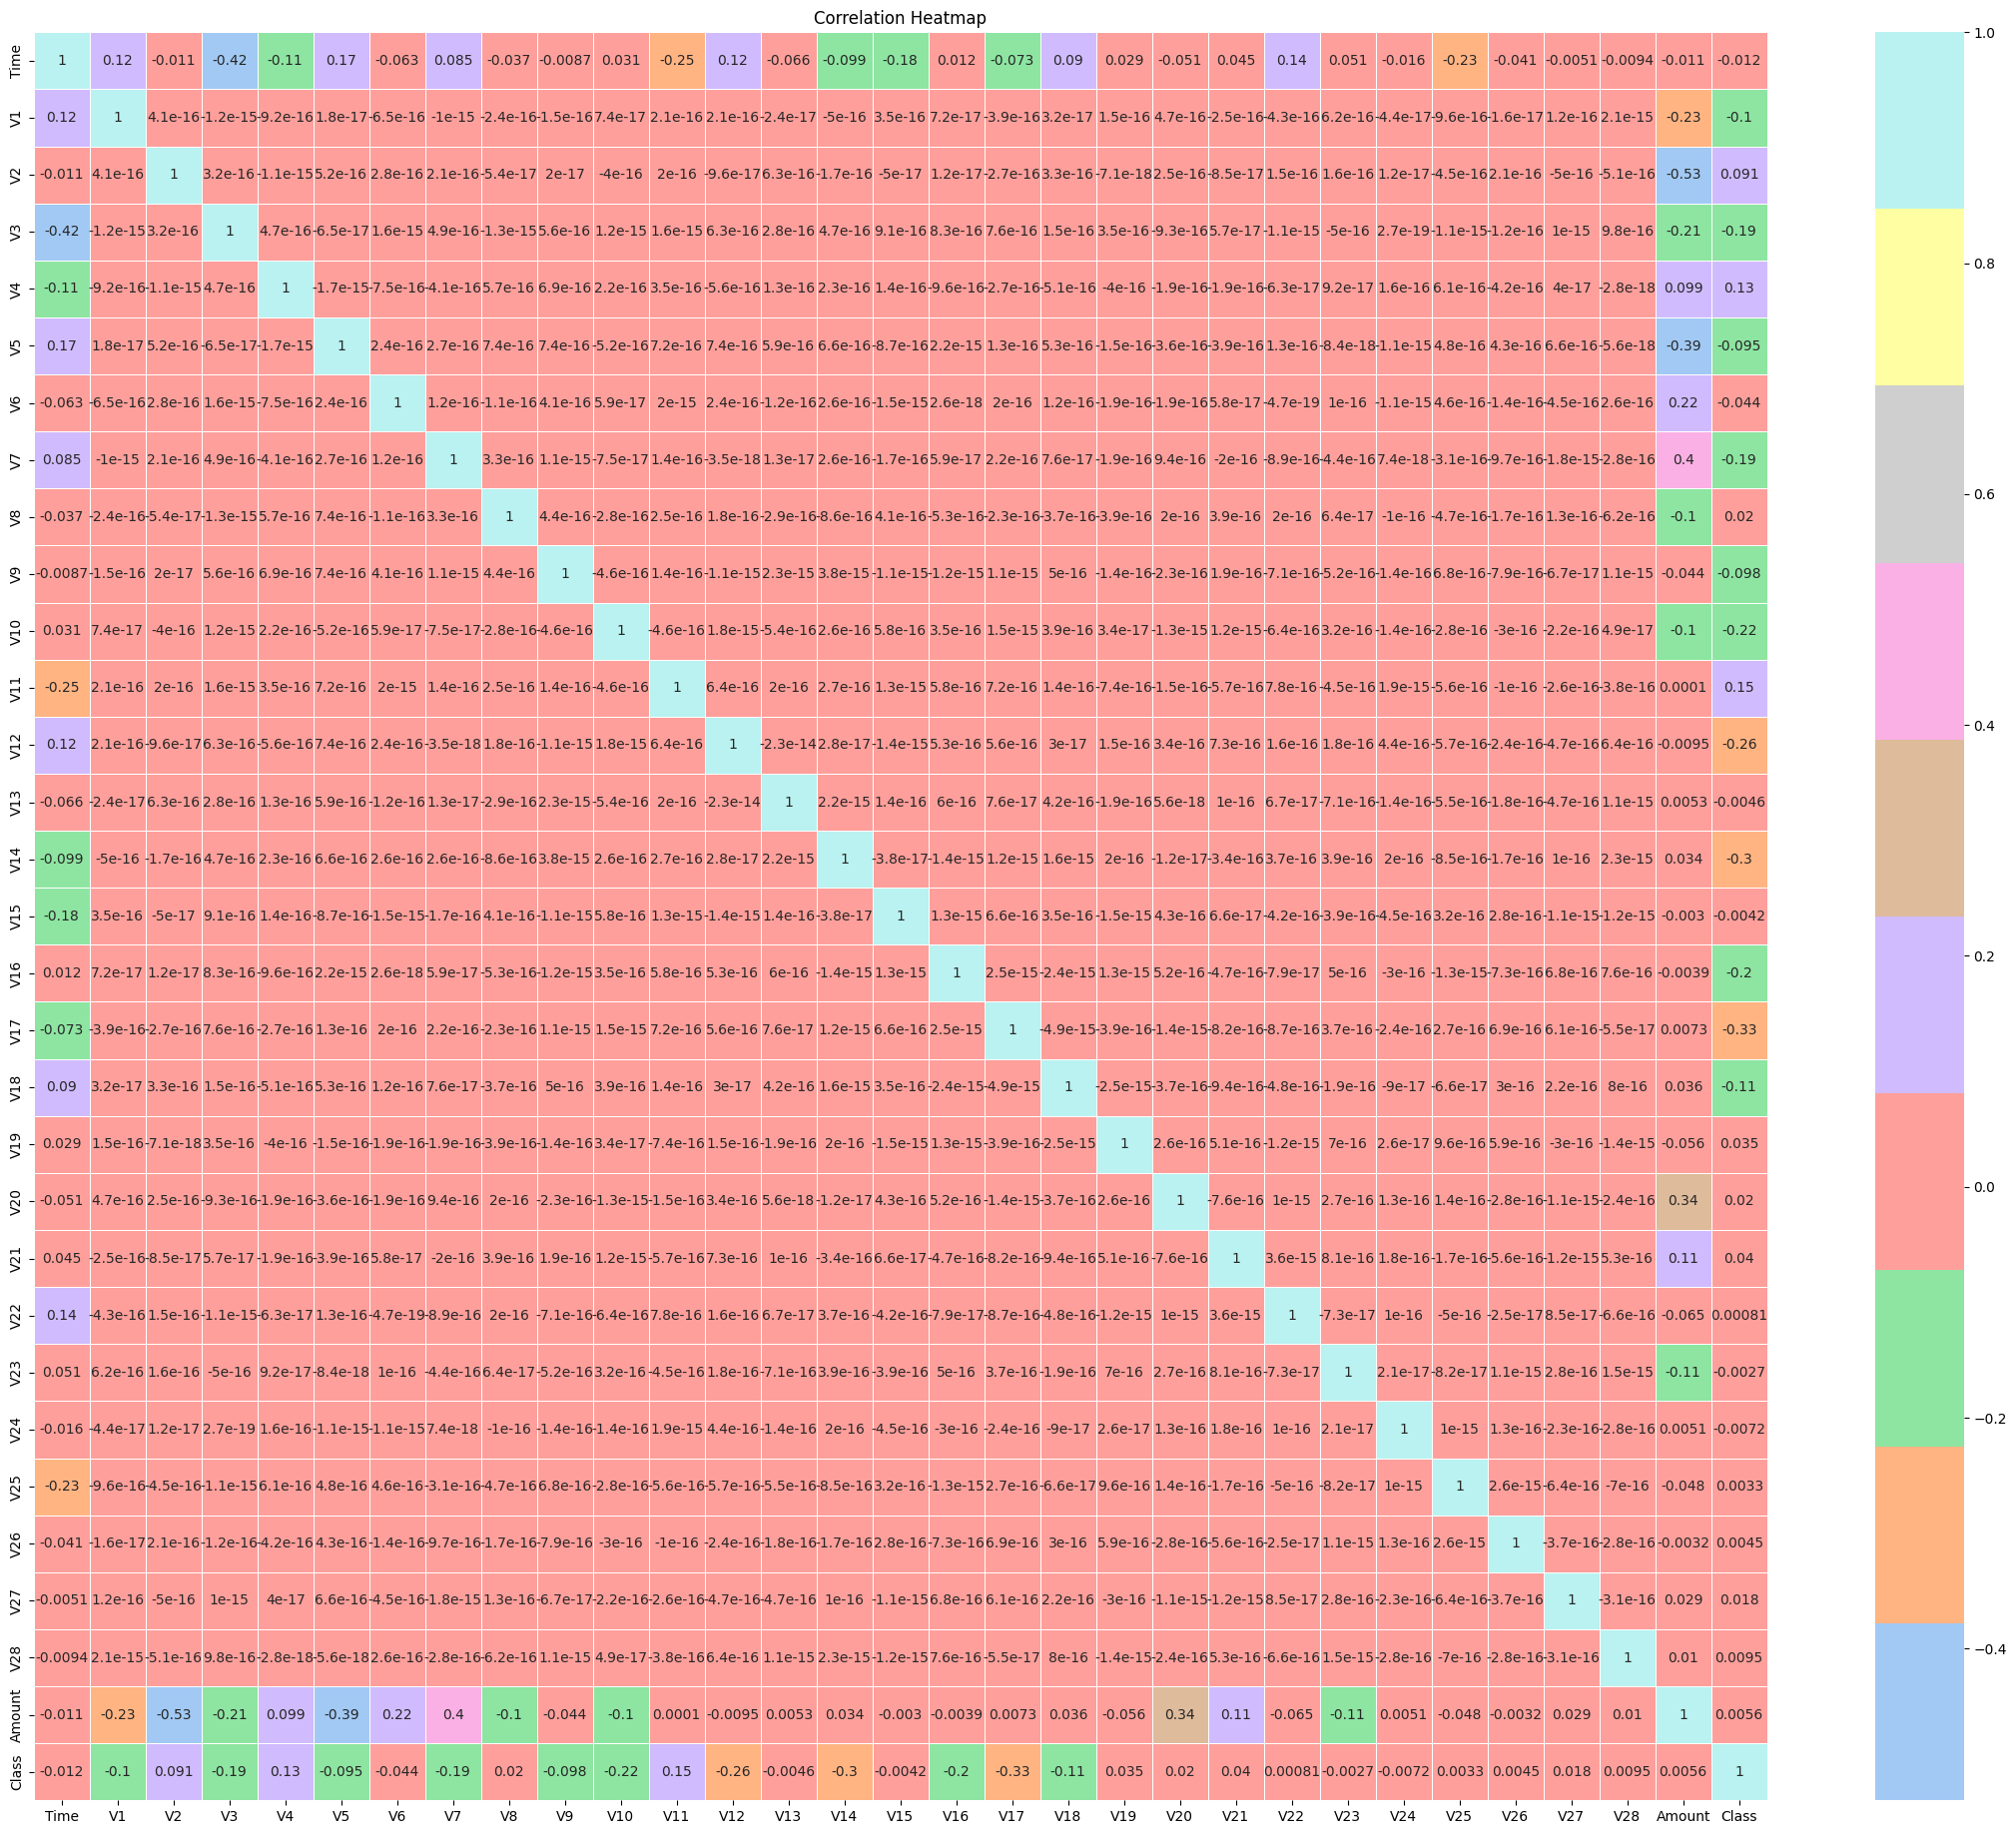

In [7]:
# Create a correlation matrix
correlation_matrix = creditcard_g05.corr()

# Set a custom color palette (e.g., "coolwarm")
custom_palette = sns.color_palette("pastel")

# Create a heatmap with custom color palette
plt.figure(figsize=(28, 23))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

5. Show the Scatterplot matrix for the dataframe (avoid matplotlib and sns for this
assignment). You can use Scatterplot Matrix Plotly. Use the code for the second image that
shows different colors for classes. In this case, you will get two colors since we have two
classes. Also, experiment with visual aspects of the image (not a lot, but an excellent visual
will always leave a better impression. you can change color, thickness, font, font size, font
color, etc.). No need to explain the plots but do save them in a pdf/svg/png with either static
export function or html export function from plotly Interactive HTML Export Plotly. (10)

In [ ]:
import plotly.express as px

# # Create a scatterplot matrix
# fig = px.scatter_matrix(creditcard_g05, dimensions=creditcard_g05.columns[:-1], color=creditcard_g05['Class'])

# # Customize the appearance
# fig.update_traces(marker=dict(size=5),
#                   selector=dict(mode='markers'))

# fig.update_layout(font=dict(size=10, color='black'),
#                   width=800, height=800,
#                   paper_bgcolor='white')

# # Save the plot as a PDF, SVG, or PNG
# fig.write_image("plot.pdf")


6. Split the dataset into the Training set and Test set. Choose your preferred split and
justify the rationale. (1)

In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature columns and 'y' contains your target variable
credit_X = creditcard_g05.drop('Class', axis=1)  # Replace 'target_column' with your actual target column name
credit_y = creditcard_g05['Class']

# Split the dataset into a training set (80%) and a test set (20%)
creditx_train_g05, creditx_test_g05, credity_train_g05, credity_test_g05 = train_test_split(credit_X, credit_y, test_size=0.2, random_state=42)

7. Perform classification routine by using LogisticRegression(), KNeighborsClassifier(),  DecisionTreeClassifier(), SVC(), GaussianNB(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), XGboostclassifier. Output the accuracy box plot as we have seen in the class (make sure to change regressmod df to classmod. And use an appropriate metric for classification evaluation, for example, accuracy, precision,recall etc). Remember to use the object oriented approach and develop a function (def…), this will be very helpful for the next assignment. (40)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


def base_models():
  models = dict()
  models['Logistic'] = LogisticRegression()
  models["NB"] = GaussianNB()
  models["KNN"] = KNeighborsClassifier()
  models["Decision Tree"] = DecisionTreeClassifier()
  models["Random Forest"] = RandomForestClassifier()
  models["GB"] = GradientBoostingClassifier()
  models["XGB"] = XGBClassifier()
  models["Bagging"] = BaggingClassifier()
  models["SVM"] = SVC()
  return models

# Function to evaluate the list of models
def eval_models(model_g05):
  cv_g05 = RepeatedKFold(n_splits=10, n_repeats=3)
  scores_g05 = cross_val_score(model_g05, creditx_train_g05, credity_train_g05, scoring='accuracy', cv=cv_g05, n_jobs=-1,
                            error_score='raise')
  return scores_g05


models_g05 = base_models()

# evaluate the models and store results
results_g05, names_g05 = list(), list()

for name, model in models_g05.items():
  scores_g05 = eval_models(model)
  results_g05.append(scores_g05)
  names_g05.append(name)
  print('>%s %.3f (%.3f)' % (name, scores_g05.mean(), scores_g05.std()))


classmod_g05 = pd.DataFrame(np.transpose(results_g05), columns = ["Logistic","NB","Decision Tree","Random Forest","GB","XGB","Bagging","SVM","KNN"])
classmod_g05 = pd.melt(classmod_g05.reset_index(), id_vars='index',value_vars=["Logistic","NB","Decision Tree","Random Forest","GB","XGB","Bagging","SVM","KNN"])


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig_g05 = px.box(classmod_g05, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig_g05.show()

>Logistic 0.999 (0.000)
>NB 0.992 (0.001)
>KNN 0.998 (0.000)
>Decision Tree 0.999 (0.000)
>Random Forest 0.999 (0.000)
>GB 0.999 (0.001)
>XGB 0.999 (0.000)
>Bagging 0.999 (0.000)
>SVM 0.998 (0.000)


8. Select the best classifier for level o classifier. Use logistic regression as a second level classifier.  Similar to 5 generate the box plot and show the accuracy of each algorithm as well as stacked classifier. Also show the confusion metrices of the above algorithms .(15)

9. Export the Pickle model and import it back. Use the imported model to predic the y_test from x_test and report the confusion metrix (3)

10. Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2)